In [2]:
#Ayush Pandhi [1003227457] [University of Toronto]
#Chloe Cheng [1003254818] [University of Toronto]

#Importing required modules
import numpy as np
import matplotlib.pyplot as plt

#Defining a function for RK4 integration using code modified from Newman (2013)
def RK4(a, b, N, f, x_init, y_init, const=False):
    h = (b - a)/N                         #Step size
    tpoints = np.arange(a, b, h)          #Time array
    xpoints = []                          #Empty list to set up x
    ypoints = []                          #Empty list to set up y
    r = np.array([x_init, y_init], float) #Initial conditions array
    
    #If there are no additional arguments in the function to be integrated:
    if const==False: 
        for t in tpoints:
            xpoints.append(r[0])
            ypoints.append(r[1])
            
            #RK4 equations
            k1 = h*f(r,t)
            k2 = h*f(r+0.5*k1, t+0.5*h)
            k3 = h*f(r+0.5*k2, t+0.5*h)
            k4 = h*f(r+k3, t+h)
            r += (k1 + 2*k2 + 2*k3 + k4)/6
        
        return np.array(tpoints, float), np.array(xpoints, float), np.array(ypoints, float)
    
    #If there are additional arguments in the function to be integrated:
    else:
        for t in tpoints:
            xpoints.append(r[0])
            ypoints.append(r[1])
            #RK4 equations
            k1 = h*f(r,t, const)
            k2 = h*f(r+0.5*k1, t+0.5*h, const)
            k3 = h*f(r+0.5*k2, t+0.5*h, const)
            k4 = h*f(r+k3, t+h, const)
            r += (k1 + 2*k2 + 2*k3 + k4)/6
            
        return np.array(tpoints, float), np.array(xpoints, float), np.array(ypoints, float)

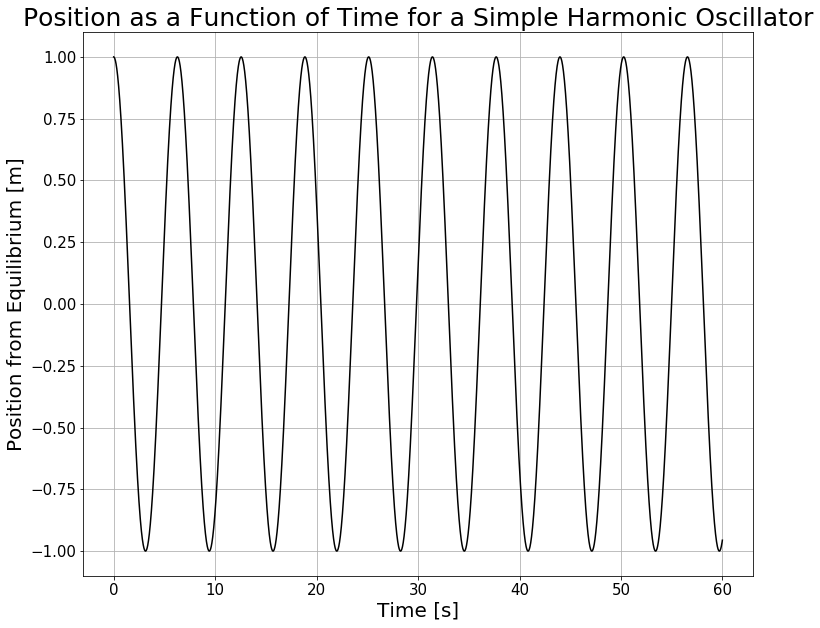

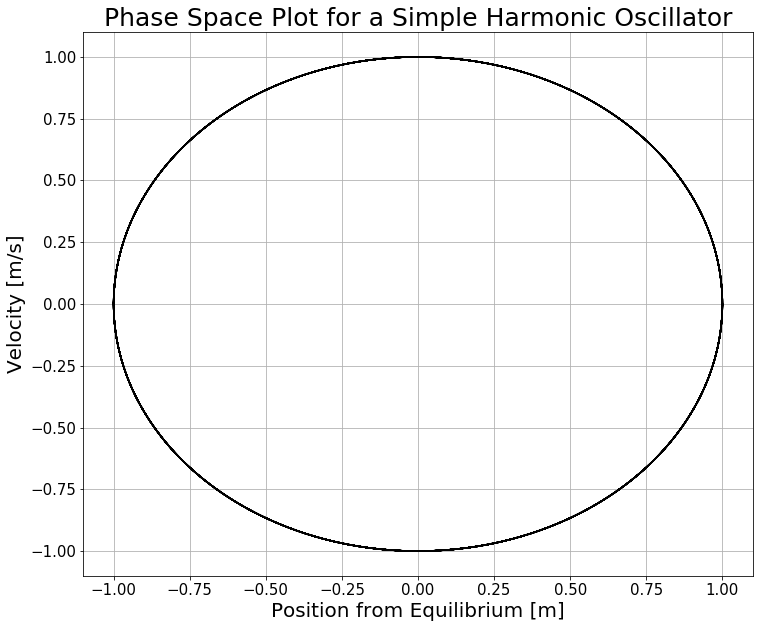

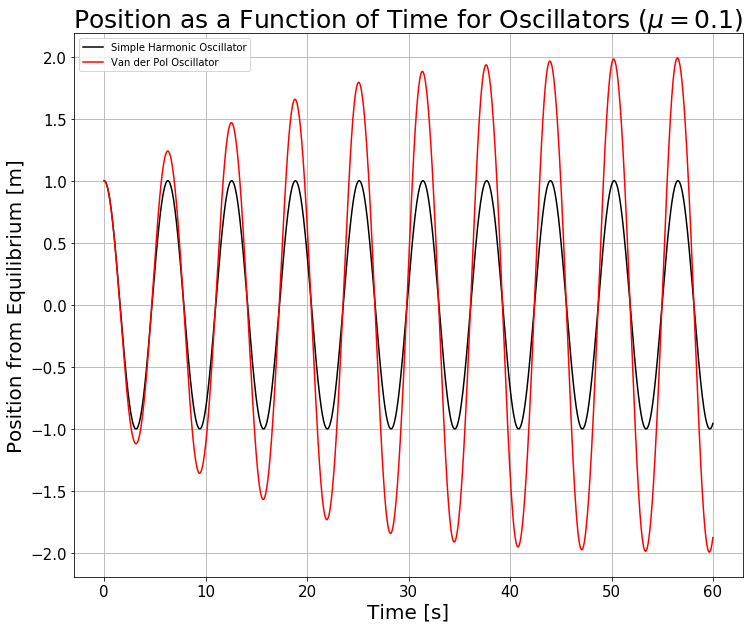

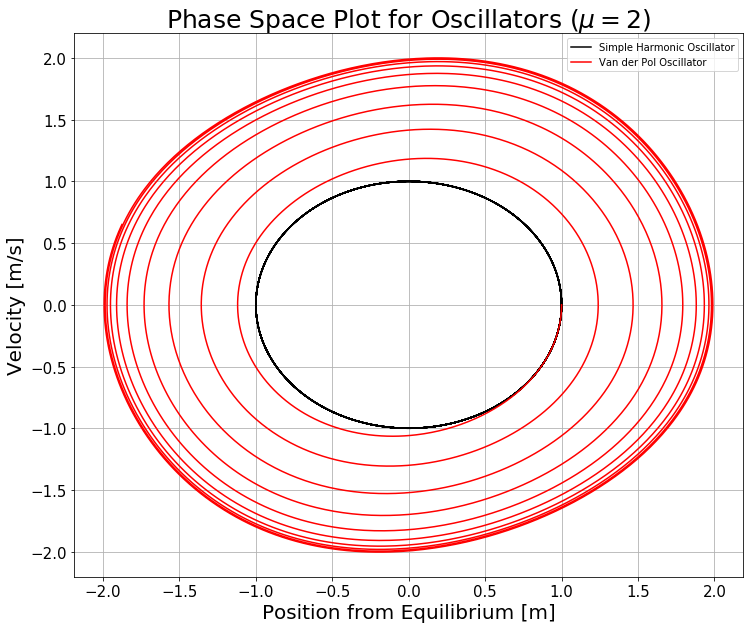

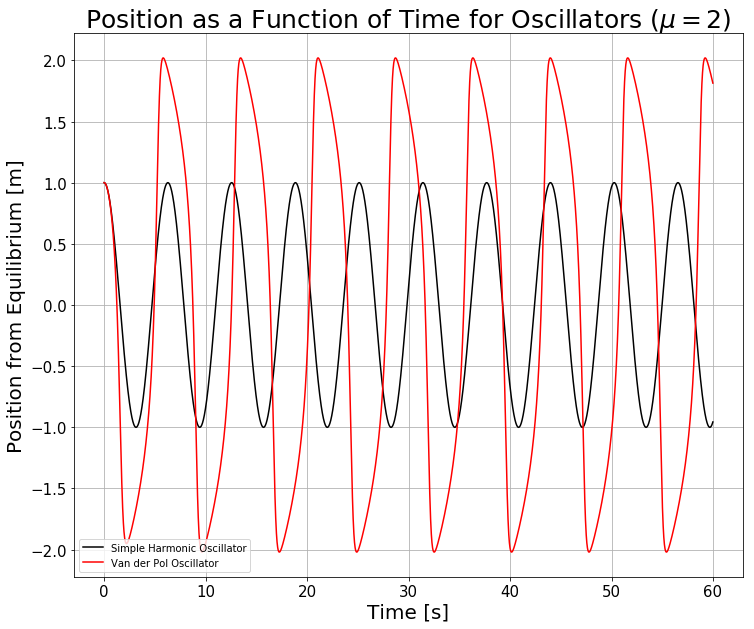

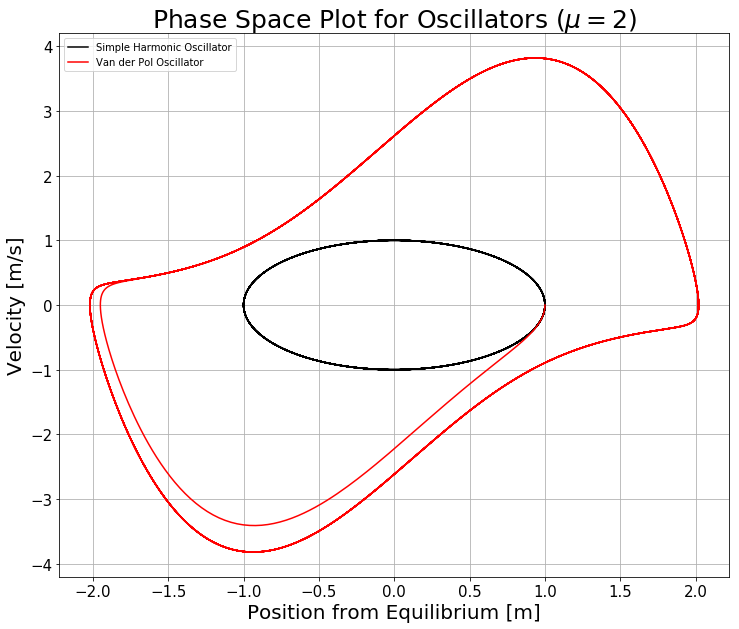

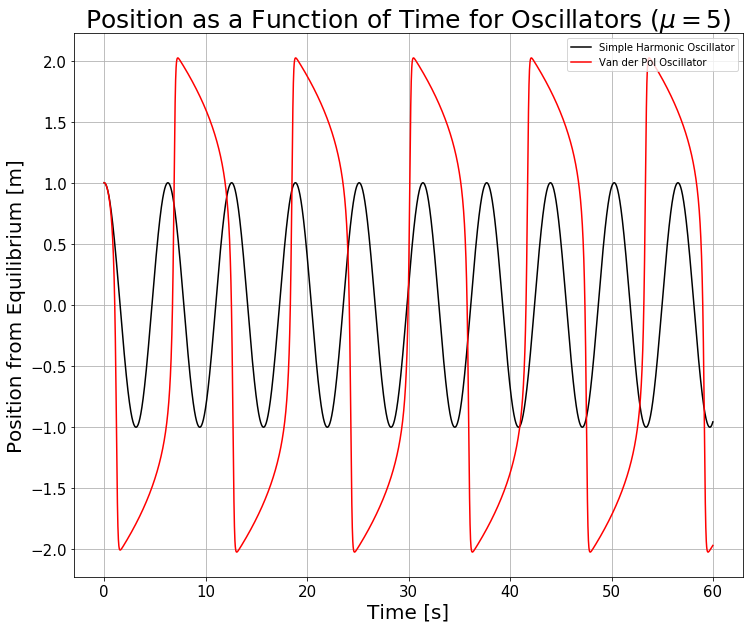

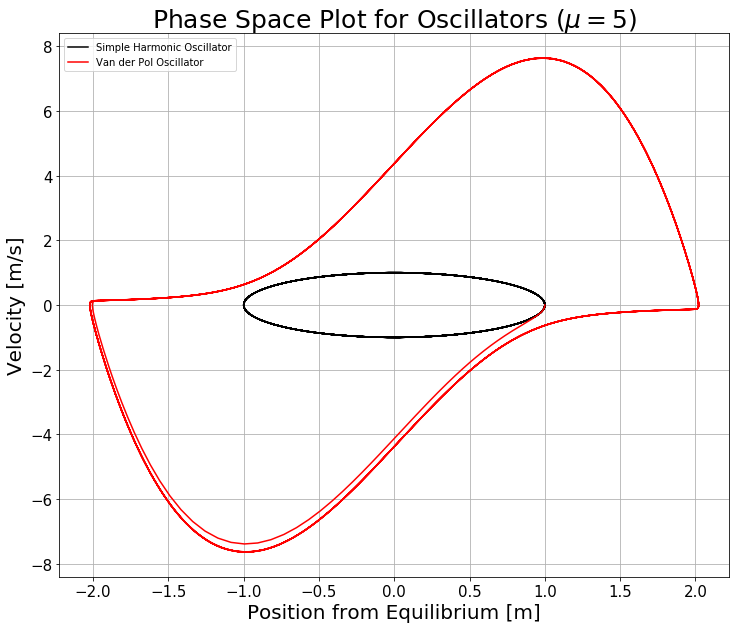

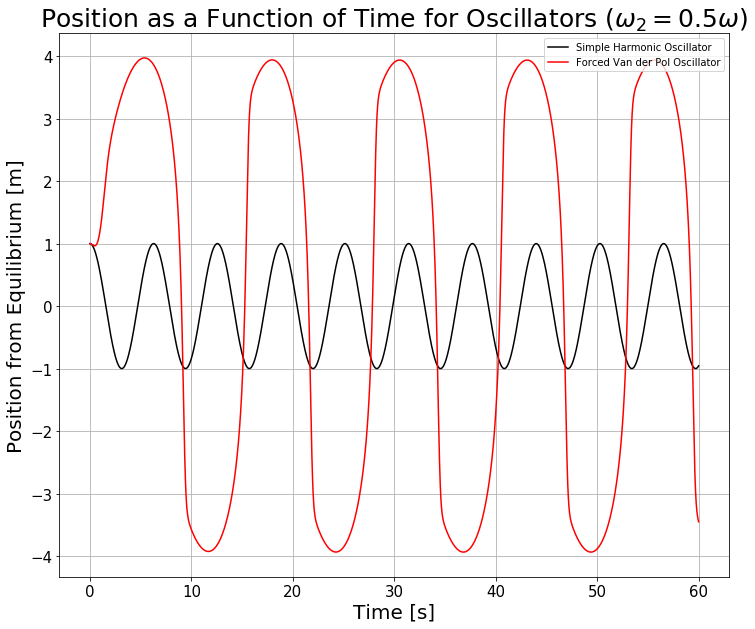

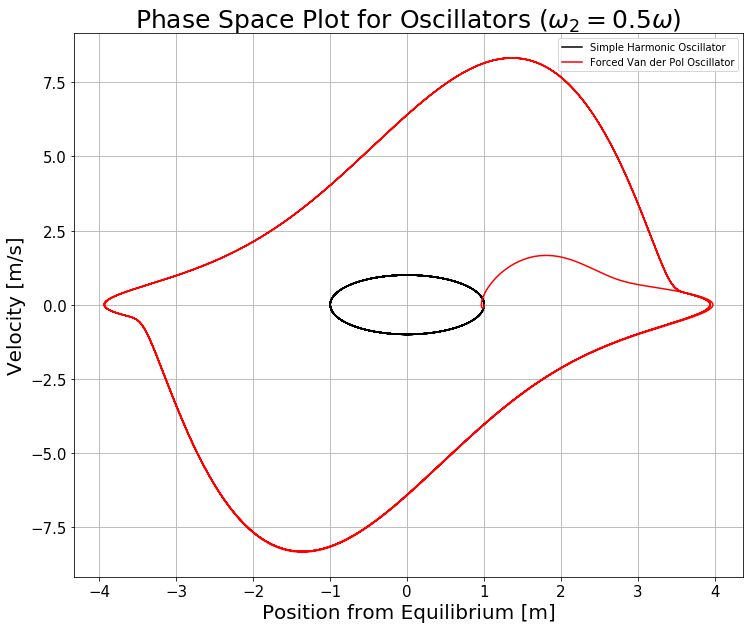

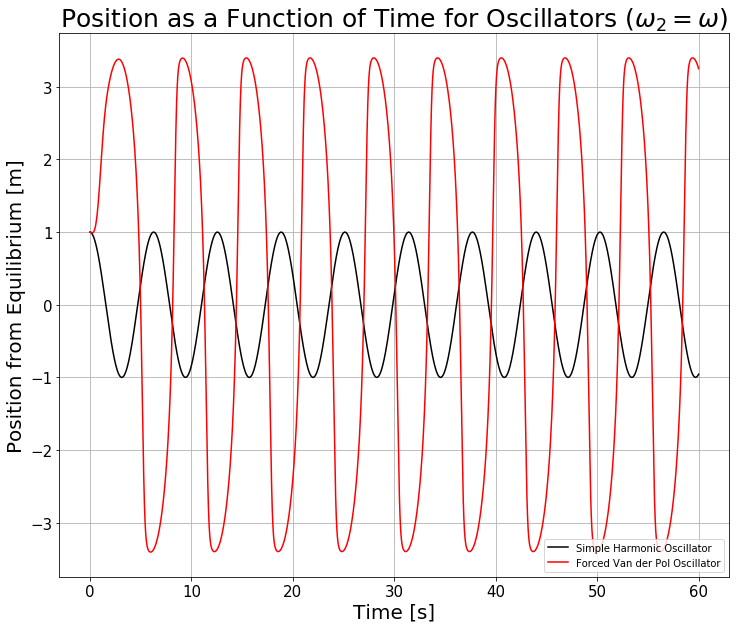

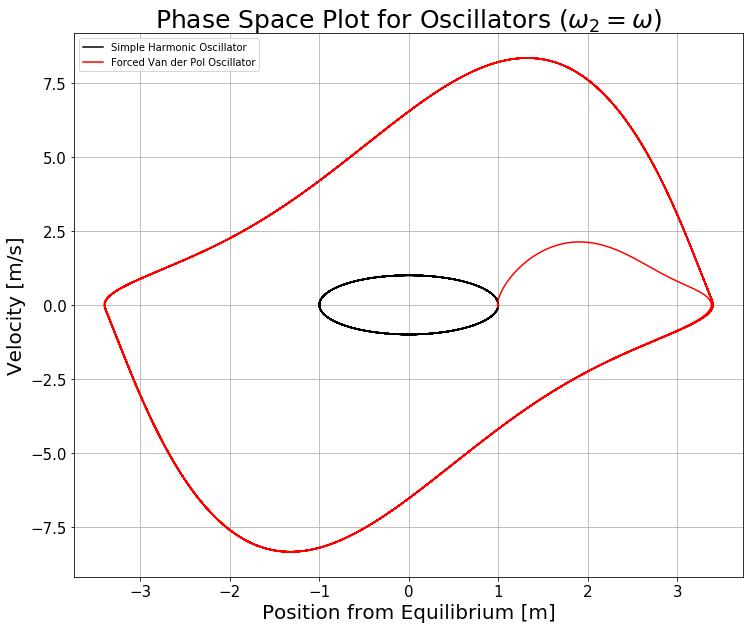

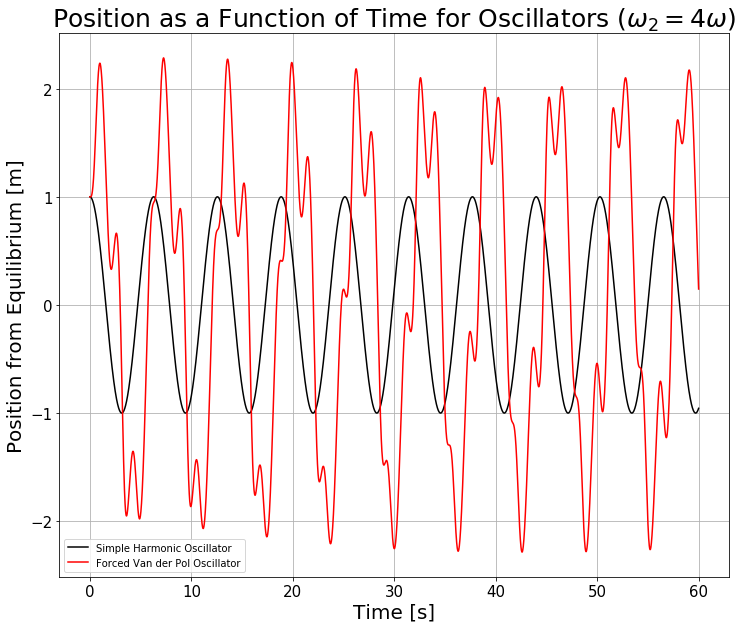

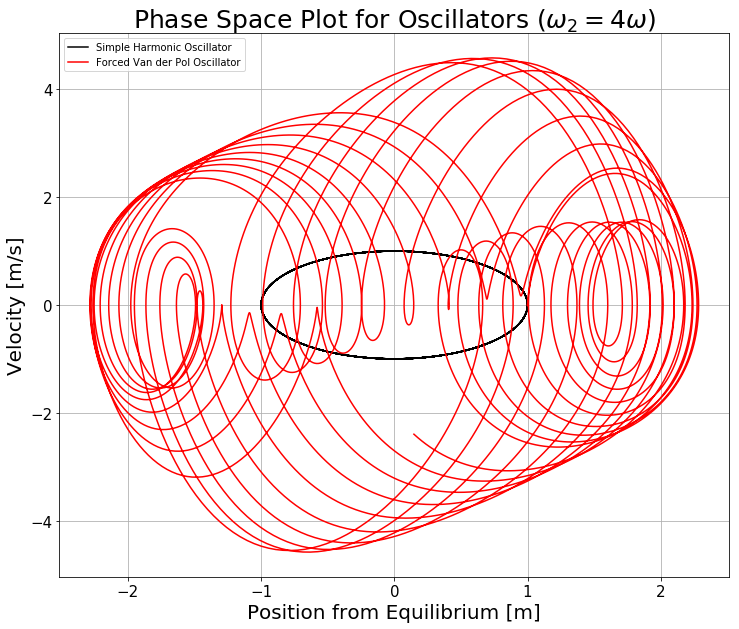

In [3]:
#PROBLEM 1

#PART A
#Defining omega for a frequency of 1 Hz
omega = 1

#Defining a function for the equation of motion of a harmonic oscillator
def harmonic(r,t):
    x = r[0]
    v = r[1]
    fx = v
    fv = -omega**2*x
    return np.array([fx, fv], float)

#Defining initial conditions
a = 0.0
b = 60.0
N = 5000 
x0 = 1.0
v0 = 0

#Applying the RK4 integrator for a simple harmonic oscillator with above initial conditions
t_harm, x_harm, v_harm = RK4(a, b, N, harmonic, x0, v0, const=False)

#Plotting position vs time
plt.figure(figsize=(12,10))
plt.plot(t_harm, x_harm, color='k')
plt.title('Position as a Function of Time for a Simple Harmonic Oscillator', fontsize=25)
plt.xlabel('Time [s]', fontsize=20)
plt.ylabel('Position from Equilibrium [m]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.savefig('lab6_q1_plot1.pdf', bbox_inches='tight')
plt.show()

#Ploting the phase space (position vs velocity)
plt.figure(figsize=(12,10))
plt.plot(x_harm, v_harm, 'k')
plt.title('Phase Space Plot for a Simple Harmonic Oscillator', fontsize=25)
plt.xlabel('Position from Equilibrium [m]', fontsize=20)
plt.ylabel('Velocity [m/s]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.savefig('lab6_q1_plot2.pdf', bbox_inches='tight')
plt.show()

#PART B
#Defining omega again for a frequency of 1Hz
omega = 1

#Defining a function for the equation of motion of a van der Pol oscillator
def vanDerpol(r, t, mu):
    x = r[0]
    v = r[1]
    fx = v
    fv = mu*(1 - x**2)*v - omega**2*x
    return np.array([fx, fv], float)

#Define initial conditions with 3 values of mu that we will test
mu1 = 0.1
mu2 = 2
mu3 = 5
a = 0
b = 60
N = 5000
x0 = 1.0
v0 = 0.0

#Applying the the RK4 integrator on the van der Pol oscillator for each value of mu
t_van1, x_van1, v_van1 = RK4(a, b, N, vanDerpol, x0, v0, const=mu1)
t_van2, x_van2, v_van2 = RK4(a, b, N, vanDerpol, x0, v0, const=mu2)
t_van3, x_van3, v_van3 = RK4(a, b, N, vanDerpol, x0, v0, const=mu3)

#Plotting position vs time for mu = 0.1
plt.figure(figsize=(12,10))
plt.plot(t_harm, x_harm, color='k', label='Simple Harmonic Oscillator')
plt.plot(t_van1, x_van1, color='r', label='Van der Pol Oscillator')
plt.title('Position as a Function of Time for Oscillators ($\mu = 0.1$)', fontsize=25)
plt.xlabel('Time [s]', fontsize=20)
plt.ylabel('Position from Equilibrium [m]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
plt.savefig('lab6_q1_plot3.pdf', bbox_inches='tight')
plt.show()

#Plotting phase space (position vs velocity) for mu = 0.1
plt.figure(figsize=(12,10))
plt.plot(x_harm, v_harm, 'k', label='Simple Harmonic Oscillator')
plt.plot(x_van1, v_van1, 'r', label='Van der Pol Oscillator')
plt.title('Phase Space Plot for Oscillators ($\mu = 2$)', fontsize=25)
plt.xlabel('Position from Equilibrium [m]', fontsize=20)
plt.ylabel('Velocity [m/s]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
plt.savefig('lab6_q1_plot4.pdf', bbox_inches='tight')
plt.show()

#Plotting position vs time for mu = 2
plt.figure(figsize=(12,10))
plt.plot(t_harm, x_harm, color='k', label='Simple Harmonic Oscillator')
plt.plot(t_van2, x_van2, color='r', label='Van der Pol Oscillator')
plt.title('Position as a Function of Time for Oscillators ($\mu = 2$)', fontsize=25)
plt.xlabel('Time [s]', fontsize=20)
plt.ylabel('Position from Equilibrium [m]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
plt.savefig('lab6_q1_plot5.pdf', bbox_inches='tight')
plt.show()

#Plotting phase space (position vs velocity) for mu = 2
plt.figure(figsize=(12,10))
plt.plot(x_harm, v_harm, 'k', label='Simple Harmonic Oscillator')
plt.plot(x_van2, v_van2, 'r', label='Van der Pol Oscillator')
plt.title('Phase Space Plot for Oscillators ($\mu = 2$)', fontsize=25)
plt.xlabel('Position from Equilibrium [m]', fontsize=20)
plt.ylabel('Velocity [m/s]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
plt.savefig('lab6_q1_plot6.pdf', bbox_inches='tight')
plt.show()

#Plotting position vs time for mu = 5
plt.figure(figsize=(12,10))
plt.plot(t_harm, x_harm, color='k', label='Simple Harmonic Oscillator')
plt.plot(t_van3, x_van3, color='r', label='Van der Pol Oscillator')
plt.title('Position as a Function of Time for Oscillators ($\mu = 5$)', fontsize=25)
plt.xlabel('Time [s]', fontsize=20)
plt.ylabel('Position from Equilibrium [m]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
plt.savefig('lab6_q1_plot7.pdf', bbox_inches='tight')
plt.show()

#Plotting phase space (position vs velocity) for mu = 5
plt.figure(figsize=(12,10))
plt.plot(x_harm, v_harm, 'k', label='Simple Harmonic Oscillator')
plt.plot(x_van3, v_van3, 'r', label='Van der Pol Oscillator')
plt.title('Phase Space Plot for Oscillators ($\mu = 5$)', fontsize=25)
plt.xlabel('Position from Equilibrium [m]', fontsize=20)
plt.ylabel('Velocity [m/s]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
plt.savefig('lab6_q1_plot8.pdf', bbox_inches='tight')
plt.show()

#PART C
#Defining mu and amplitude as given
mu4 = 1
A = 8.53

#Defining a function for a damped van der Pol oscillator
def vanDerpol_damped(r, t, omega2):
    x = r[0]
    v = r[1]
    fx = v
    fv = mu4*(1 - x**2)*v - omega**2*x + A*np.sin(omega2*t)
    return np.array([fx, fv], float)

#Define initial conditions with 3 values of omega2
omega2_1 = 0.5*omega
omega2_2 = omega 
omega2_3 = 4*omega
a = 0
b = 60
N = 5000
x0 = 1.0
v0 = 0.0

#Applying the RK4 integrator on the damped van der Pol oscillator for each value of omega2
t_van_damped1, x_van_damped1, v_van_damped1 = RK4(a, b, N, vanDerpol_damped, x0, v0, const=omega2_1)
t_van_damped2, x_van_damped2, v_van_damped2 = RK4(a, b, N, vanDerpol_damped, x0, v0, const=omega2_2)
t_van_damped3, x_van_damped3, v_van_damped3 = RK4(a, b, N, vanDerpol_damped, x0, v0, const=omega2_3)

#Plotting position vs time for omega2 = 0.5omega
plt.figure(figsize=(12,10))
plt.plot(t_harm, x_harm, color='k', label='Simple Harmonic Oscillator')
plt.plot(t_van_damped1, x_van_damped1, color='r', label='Forced Van der Pol Oscillator')
plt.title('Position as a Function of Time for Oscillators ($\omega_2 = 0.5\omega$)', fontsize=25)
plt.xlabel('Time [s]', fontsize=20)
plt.ylabel('Position from Equilibrium [m]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
plt.savefig('lab6_q1_plot9.pdf', bbox_inches='tight')
plt.show()

#Plotting phase space (position vs velocity) for omega2 = 0.5omega
plt.figure(figsize=(12,10))
plt.plot(x_harm, v_harm, 'k', label='Simple Harmonic Oscillator')
plt.plot(x_van_damped1, v_van_damped1, 'r', label='Forced Van der Pol Oscillator')
plt.title('Phase Space Plot for Oscillators ($\omega_2 = 0.5\omega$)', fontsize=25)
plt.xlabel('Position from Equilibrium [m]', fontsize=20)
plt.ylabel('Velocity [m/s]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
plt.savefig('lab6_q1_plot10.pdf', bbox_inches='tight')
plt.show()

#Plotting position vs. time for omega2 = omega
plt.figure(figsize=(12,10))
plt.plot(t_harm, x_harm, color='k', label='Simple Harmonic Oscillator')
plt.plot(t_van_damped2, x_van_damped2, color='r', label='Forced Van der Pol Oscillator')
plt.title('Position as a Function of Time for Oscillators ($\omega_2 = \omega$)', fontsize=25)
plt.xlabel('Time [s]', fontsize=20)
plt.ylabel('Position from Equilibrium [m]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
plt.savefig('lab6_q1_plot11.pdf', bbox_inches='tight')
plt.show()

#Plotting phase space (position vs velocity) for omega2 = omega
plt.figure(figsize=(12,10))
plt.plot(x_harm, v_harm, 'k', label='Simple Harmonic Oscillator')
plt.plot(x_van_damped2, v_van_damped2, 'r', label='Forced Van der Pol Oscillator')
plt.title('Phase Space Plot for Oscillators ($\omega_2 = \omega$)', fontsize=25)
plt.xlabel('Position from Equilibrium [m]', fontsize=20)
plt.ylabel('Velocity [m/s]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
plt.savefig('lab6_q1_plot12.pdf', bbox_inches='tight')
plt.show()

#Plotting position vs time for omega2 = 4omega
plt.figure(figsize=(12,10))
plt.plot(t_harm, x_harm, color='k', label='Simple Harmonic Oscillator')
plt.plot(t_van_damped3, x_van_damped3, color='r', label='Forced Van der Pol Oscillator')
plt.title('Position as a Function of Time for Oscillators ($\omega_2 = 4\omega$)', fontsize=25)
plt.xlabel('Time [s]', fontsize=20)
plt.ylabel('Position from Equilibrium [m]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
plt.savefig('lab6_q1_plot13.pdf', bbox_inches='tight')
plt.show()

#Plotting phase space (position vs velocity) for omega2 = 4omega
plt.figure(figsize=(12,10))
plt.plot(x_harm, v_harm, 'k', label='Simple Harmonic Oscillator')
plt.plot(x_van_damped3, v_van_damped3, 'r', label='Forced Van der Pol Oscillator')
plt.title('Phase Space Plot for Oscillators ($\omega_2 = 4\omega$)', fontsize=25)
plt.xlabel('Position from Equilibrium [m]', fontsize=20)
plt.ylabel('Velocity [m/s]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
plt.savefig('lab6_q1_plot14.pdf', bbox_inches='tight')
plt.show()

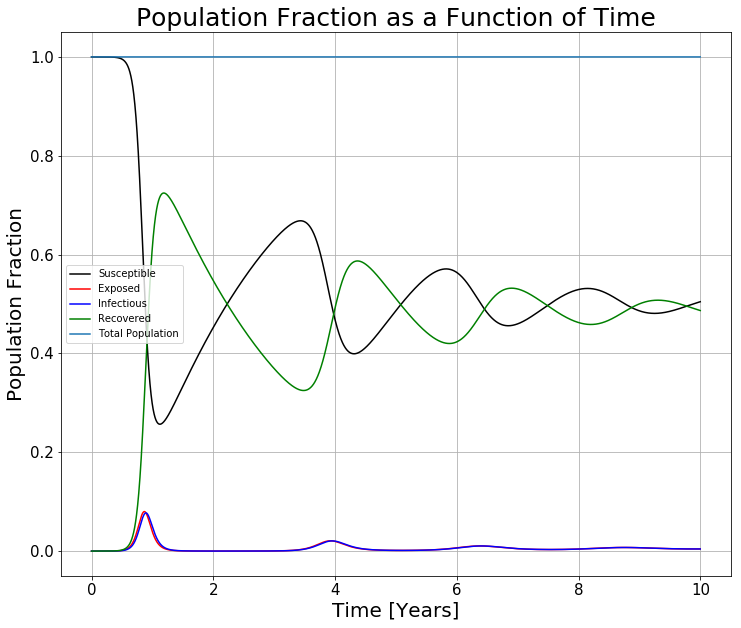

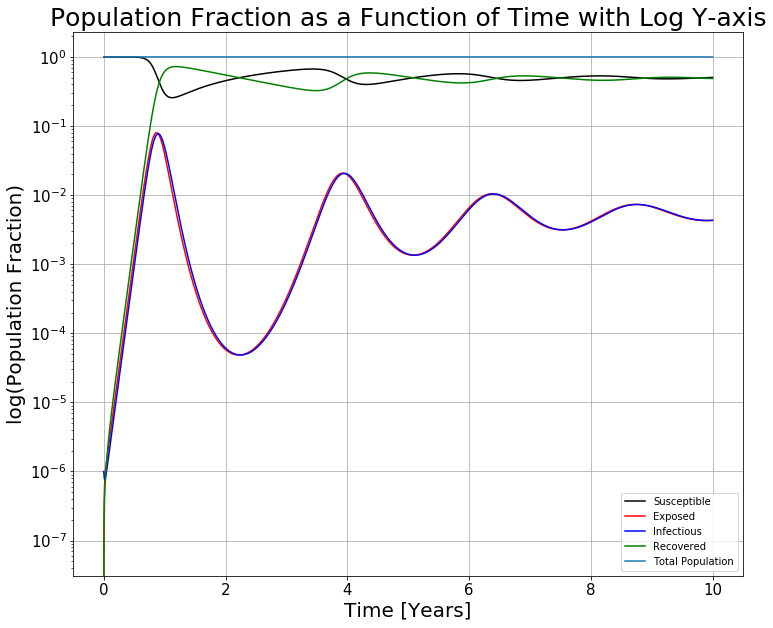

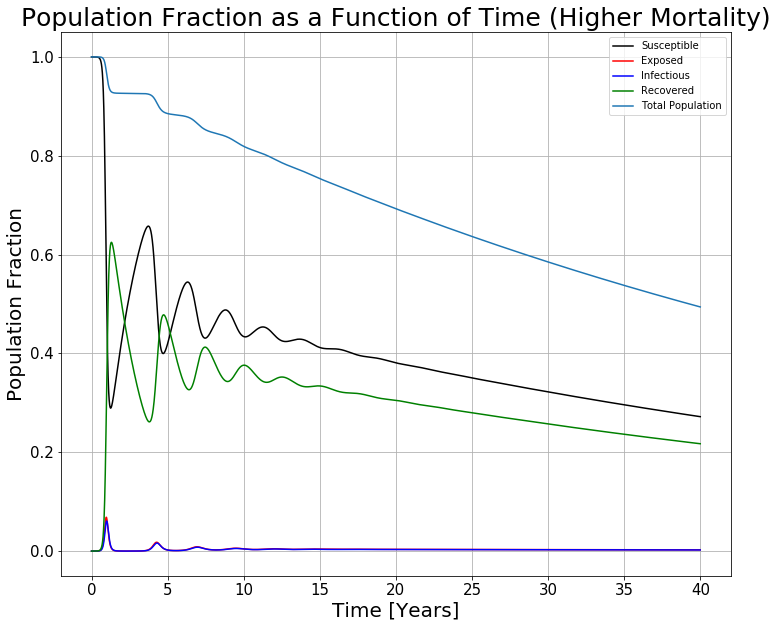

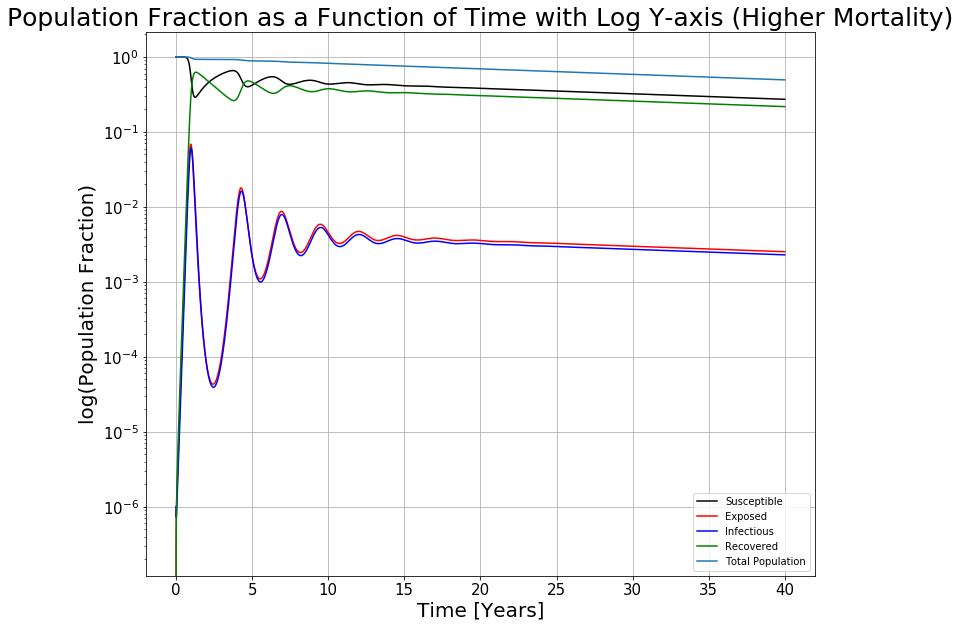

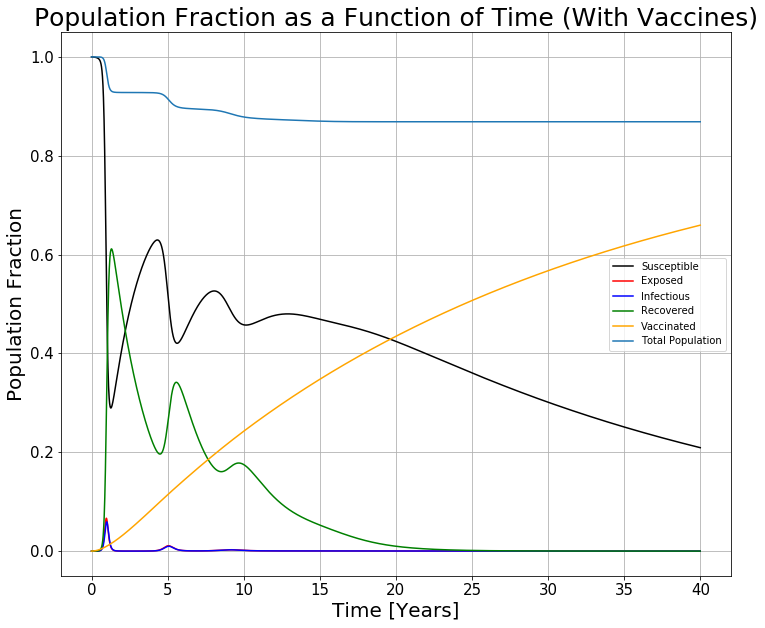

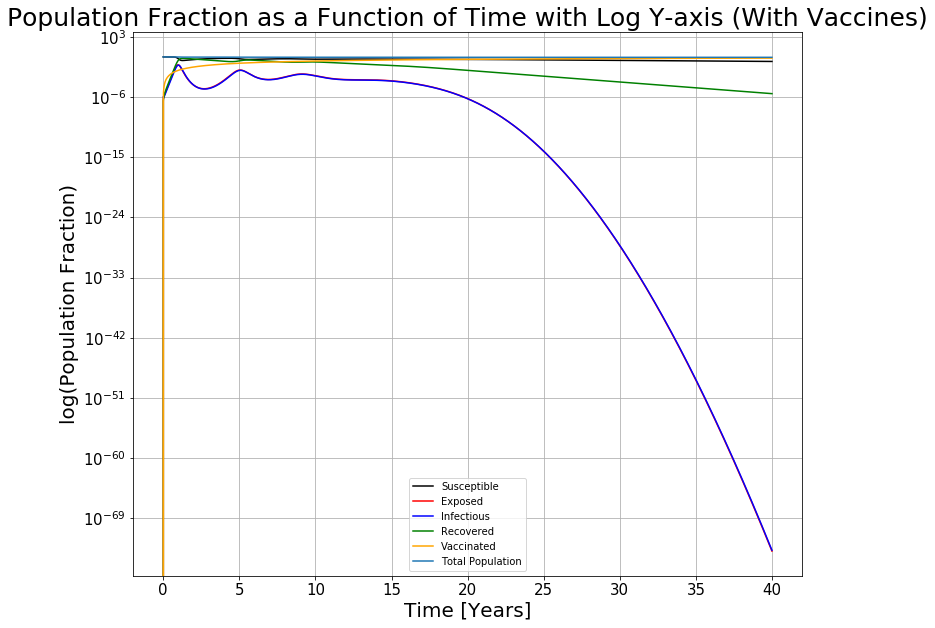

In [8]:
#PROBLEM 2

#Modifying the earlier RK4 function we defined to use for the SEIR model
def RK4_4(a, b, N, f, s_init, e_init, i_init, r_init, const=False):
    h = (b - a)/N                #Step size 
    tpoints = np.arange(a, b, h) #Time array
    spoints = []
    epoints = []
    ipoints = []
    rpoints = []
    r = np.array([s_init, e_init, i_init, r_init], float) #Initial conditions array
    
    #If there are no additional arguments in the function to be integrated:
    if const==False: 
        for t in tpoints:
            spoints.append(r[0])
            epoints.append(r[1])
            ipoints.append(r[2])
            rpoints.append(r[3])
            #RK4 equations
            k1 = h*f(r,t)
            k2 = h*f(r+0.5*k1, t+0.5*h)
            k3 = h*f(r+0.5*k2, t+0.5*h)
            k4 = h*f(r+k3, t+h)
            r += (k1 + 2*k2 + 2*k3 + k4)/6
        return np.array(tpoints, float), np.array(spoints, float), np.array(epoints, float), np.array(ipoints, float), np.array(rpoints, float)
    
    #If there are additional arguments in the function to be integrated:
    else:
        for t in tpoints:
            spoints.append(r[0])
            epoints.append(r[1])
            ipoints.append(r[2])
            rpoints.append(r[3])
            #RK4 equations
            k1 = h*f(r,t, const)
            k2 = h*f(r+0.5*k1, t+0.5*h, const)
            k3 = h*f(r+0.5*k2, t+0.5*h, const)
            k4 = h*f(r+k3, t+h, const)
            r += (k1 + 2*k2 + 2*k3 + k4)/6
        return np.array(tpoints, float), np.array(spoints, float), np.array(epoints, float), np.array(ipoints, float), np.array(rpoints, float)

#PART C
#Defining constants
b = 1e-4
d = 1e-4
alpha = 0.1
beta = 0.2
gamma = 0.1
nu = 1e-3
N = 1

#Defining function for SEIR model
def SEIR(r, t):
    S = r[0]
    E = r[1]
    I = r[2]
    R = r[3]
    N = S + E + I + R
    dS = b*N - d*S - beta*(I/N)*S + nu*R
    dE = beta*(I/N)*S - alpha*E - d*E
    dI = alpha*E - gamma*I - d*I
    dR = gamma*I - nu*R - d*R
    return np.array([dS, dE, dI, dR], float)

#Define initial conditions
t_init = 0
t_final = 10*365 #10 years in seconds
i_init = 1e-6
s_init = N - i_init
e_init = 0.0
r_init = 0.0
Nsteps = 5000

#Applying the functions from the SEIR model and RK4 integrator
t_SEIR, susceptible, exposed, infectious, recovered = RK4_4(t_init, t_final, Nsteps, SEIR, s_init, e_init, i_init, r_init, const=False)
t_SEIR = t_SEIR/365 #Time in years instead of days

#Computing the total population for this model
total_pop = susceptible + exposed + infectious + recovered

#Plotting population fractions as function of time
plt.figure(figsize=(12,10))
plt.plot(t_SEIR, susceptible, 'k', label='Susceptible')
plt.plot(t_SEIR, exposed, 'r', label='Exposed')
plt.plot(t_SEIR, infectious, 'b', label='Infectious')
plt.plot(t_SEIR, recovered, 'g', label='Recovered')
plt.plot(t_SEIR, total_pop, label='Total Population')
plt.title('Population Fraction as a Function of Time', fontsize=25)
plt.xlabel('Time [Years]', fontsize=20)
plt.ylabel('Population Fraction', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
plt.savefig('lab6_q2_plot1.pdf', bbox_inches='tight')
plt.show()

#Plotting population fractions as function of time with log y axis
plt.figure(figsize=(12,10))
plt.plot(t_SEIR, susceptible, 'k', label='Susceptible')
plt.plot(t_SEIR, exposed, 'r', label='Exposed')
plt.plot(t_SEIR, infectious, 'b', label='Infectious')
plt.plot(t_SEIR, recovered, 'g', label='Recovered')
plt.plot(t_SEIR, total_pop, label='Total Population')
plt.title('Population Fraction as a Function of Time with Log Y-axis', fontsize=25)
plt.xlabel('Time [Years]', fontsize=20)
plt.ylabel('log(Population Fraction)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
plt.semilogy()
plt.savefig('lab6_q2_plot2.pdf', bbox_inches='tight')
plt.show()

#PART D
#Defining birth, death and mortality rates
b = 1e-4
d = 1e-4
m = 100e-4

#Defining a function for SEIR model with higher mortality rate during infections
def SEIR_higher_mortality(r, t):
    S = r[0]
    E = r[1]
    I = r[2]
    R = r[3]
    N = S + E + I + R
    dS = b*N - d*S - beta*(I/N)*S + nu*R
    dE = beta*(I/N)*S - alpha*E - d*E
    dI = alpha*E - gamma*I - m*I - d*I
    dR = gamma*I - nu*R - d*R
    return np.array([dS, dE, dI, dR], float)

#Define initial conditions
t_init_m = 0
t_final_m = 40*365
Nsteps_m = 5000

#Applying the functions from the SEIR model with a higher mortality rate and RK4 integrator
t_SEIR_m, susceptible_m, exposed_m, infectious_m, recovered_m = RK4_4(t_init_m, t_final_m, Nsteps_m, SEIR_higher_mortality, s_init, e_init, i_init, r_init, const=False)
t_SEIR_m = t_SEIR_m/365 #Time in years instead of days

#Computing the total population for this model
total_pop_m = susceptible_m + exposed_m + infectious_m + recovered_m

#Plotting population fractions as function of time
plt.figure(figsize=(12,10))
plt.plot(t_SEIR_m, susceptible_m, 'k', label='Susceptible')
plt.plot(t_SEIR_m, exposed_m, 'r', label='Exposed')
plt.plot(t_SEIR_m, infectious_m, 'b', label='Infectious')
plt.plot(t_SEIR_m, recovered_m, 'g', label='Recovered')
plt.plot(t_SEIR_m, total_pop_m, label='Total Population')
plt.title('Population Fraction as a Function of Time (Higher Mortality)', fontsize=25)
plt.xlabel('Time [Years]', fontsize=20)
plt.ylabel('Population Fraction', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
plt.savefig('lab6_q2_plot3.pdf', bbox_inches='tight')
plt.show()

#Plotting population fractions as function of time with logaxis
plt.figure(figsize=(12,10))
plt.plot(t_SEIR_m, susceptible_m, 'k', label='Susceptible')
plt.plot(t_SEIR_m, exposed_m, 'r', label='Exposed')
plt.plot(t_SEIR_m, infectious_m, 'b', label='Infectious')
plt.plot(t_SEIR_m, recovered_m, 'g', label='Recovered')
plt.plot(t_SEIR_m, total_pop_m, label='Total Population')
plt.title('Population Fraction as a Function of Time with Log Y-axis (Higher Mortality)', fontsize=25)
plt.xlabel('Time [Years]', fontsize=20)
plt.ylabel('log(Population Fraction)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
plt.semilogy()
plt.savefig('lab6_q2_plot4.pdf', bbox_inches='tight')
plt.show()

#PART E
#Modifying the RK4 function for the SEIRV model
def RK4_5(a, b, N, f, s_init, e_init, i_init, r_init, v_init, const=False):
    h = (b - a)/N #Step size 
    tpoints = np.arange(a, b, h) #Time array
    spoints = []
    epoints = []
    ipoints = []
    rpoints = []
    vpoints = []
    r = np.array([s_init, e_init, i_init, r_init, v_init], float) #Initial conditions array
    
    #If there are no additional arguments in the function to be integrated:
    if const==False: 
        for t in tpoints:
            spoints.append(r[0])
            epoints.append(r[1])
            ipoints.append(r[2])
            rpoints.append(r[3])
            vpoints.append(r[4])
            #RK4 equations
            k1 = h*f(r,t)
            k2 = h*f(r+0.5*k1, t+0.5*h)
            k3 = h*f(r+0.5*k2, t+0.5*h)
            k4 = h*f(r+k3, t+h)
            r += (k1 + 2*k2 + 2*k3 + k4)/6
        return np.array(tpoints, float), np.array(spoints, float), np.array(epoints, float), np.array(ipoints, float), np.array(rpoints, float), np.array(vpoints, float)
    
    #If there are additional arguments in the function to be integrated:
    else:
        for t in tpoints:
            spoints.append(r[0])
            epoints.append(r[1])
            ipoints.append(r[2])
            rpoints.append(r[3])
            vpoints.append(r[4])
            #RK4 equations
            k1 = h*f(r,t, const)
            k2 = h*f(r+0.5*k1, t+0.5*h, const)
            k3 = h*f(r+0.5*k2, t+0.5*h, const)
            k4 = h*f(r+k3, t+h, const)
            r += (k1 + 2*k2 + 2*k3 + k4)/6
        return np.array(tpoints, float), np.array(spoints, float), np.array(epoints, float), np.array(ipoints, float), np.array(rpoints, float), np.array(vpoints, float)
    
#Defining a function for the SEIRV model
def SEIR_vacc(r, t):
    S = r[0]
    E = r[1]
    I = r[2]
    R = r[3]
    V = r[4]
    N = S + E + I + R + V
    exponent = ((t + (15*365)) - 5475)/365
    P = 1 - 2**(-exponent)
    dV = P*b*N - d*V
    dS = (1 - P)*b*N - d*S - beta*(I/N)*S + nu*R
    dE = beta*(I/N)*S - alpha*E - d*E
    dI = alpha*E - gamma*I - m*I - d*I
    dR = gamma*I - nu*R - d*R
    return np.array([dS, dE, dI, dR, dV], float)

#Defining new initial condition
v_init = 0.0

#Applying the functions for the SEIRV model and RK4 integrator
t_SEIR_vacc, susceptible_vacc, exposed_vacc, infectious_vacc, recovered_vacc, vaccinated = RK4_5(t_init_m, t_final_m, Nsteps_m, SEIR_vacc, s_init, e_init, i_init, r_init, v_init, const=False)
t_SEIR_vacc = t_SEIR_vacc/365 #Time in years instead of days

#Computing the total population for this model
total_pop_m = susceptible_vacc + exposed_vacc + infectious_vacc + recovered_vacc + vaccinated

#Plotting population fractions as function of time
plt.figure(figsize=(12,10))
plt.plot(t_SEIR_vacc, susceptible_vacc, 'k', label='Susceptible')
plt.plot(t_SEIR_vacc, exposed_vacc, 'r', label='Exposed')
plt.plot(t_SEIR_vacc, infectious_vacc, 'b', label='Infectious')
plt.plot(t_SEIR_vacc, recovered_vacc, 'g', label='Recovered')
plt.plot(t_SEIR_vacc, vaccinated, 'orange', label='Vaccinated')
plt.plot(t_SEIR_m, total_pop_m, label='Total Population')
plt.title('Population Fraction as a Function of Time (With Vaccines)', fontsize=25)
plt.xlabel('Time [Years]', fontsize=20)
plt.ylabel('Population Fraction', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
plt.savefig('lab6_q2_plot5.pdf', bbox_inches='tight')
plt.show()

#Plotting population fractions as function of time with logaxis
plt.figure(figsize=(12,10))
plt.plot(t_SEIR_vacc, susceptible_vacc, 'k', label='Susceptible')
plt.plot(t_SEIR_vacc, exposed_vacc, 'r', label='Exposed')
plt.plot(t_SEIR_vacc, infectious_vacc, 'b', label='Infectious')
plt.plot(t_SEIR_vacc, recovered_vacc, 'g', label='Recovered')
plt.plot(t_SEIR_vacc, vaccinated, 'orange', label='Vaccinated')
plt.plot(t_SEIR_m, total_pop_m, label='Total Population')
plt.title('Population Fraction as a Function of Time with Log Y-axis (With Vaccines)', fontsize=25)
plt.xlabel('Time [Years]', fontsize=20)
plt.ylabel('log(Population Fraction)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
plt.semilogy()
plt.savefig('lab6_q2_plot6.pdf', bbox_inches='tight')
plt.show()